# Name 
Joshua Hong

In [2]:
from mpl_toolkits.basemap import Basemap
import statistics
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from election_data import results2016
import random
from collections import Counter
from collections import defaultdict
from scipy import stats
from scipy.stats import norm
from election_data import mean_std
import random

# Mapping

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


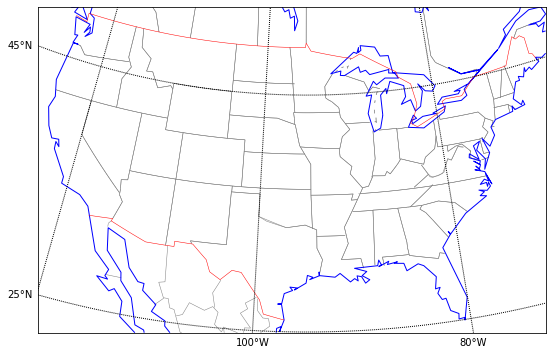

In [3]:
plt.figure(figsize=(12,6))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
             projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.drawstates(color = 'gray')
m.drawcoastlines(color = 'blue')
m.drawcountries(color='red')
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1]);

The code above was used as reference tutorial for understanding Basemaps (from class)

0.0 (r=0.000, g=0.000, b=0.300)
0.25 (r=0.004, g=0.004, b=1.000)
0.5 (r=1.000, g=0.992, b=0.992)
0.75 (r=0.994, g=0.000, b=0.000)
1.0 (r=0.500, g=0.000, b=0.000)


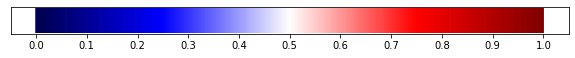

In [4]:
mycmap = plt.cm.get_cmap('seismic')
plt.figure(figsize=(10,.5))
xdata=np.arange(0,1.0001,.001)
plt.vlines(xdata,0,1,colors=mycmap(xdata))
plt.xticks(np.arange(0,1.05,.1))
plt.yticks([])

for i in np.arange(0,1.1,.25): print (i,'(r={:.3f}, g={:.3f}, b={:.3f})'.format(*mycmap(i)))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


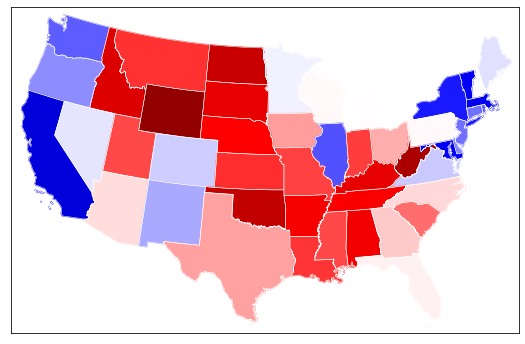

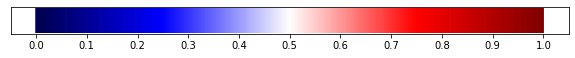

In [5]:
plt.figure(figsize=(12,6))
m1 = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
             projection='lcc',lat_1=33,lat_2=45,lon_0=-95) 
m1.readshapefile('geodata/st99_d90','states',drawbounds=True,color='w')
for polygon,info in zip(m1.states,m1.states_info):
    state = info['NAME']
    if state in ('District of Columbia'): continue
    result = results2016[state]['Trump'] - results2016[state]['Clinton']
    colors = mycmap(.5 + result/100)
    xdata,ydata = zip(*polygon)
    plt.fill(xdata,ydata,color=colors,edgecolor='darkgrey')
plt.figure(figsize=(10,.5))
xdata=np.arange(0,1.0001,.001)
plt.vlines(xdata,0,1,colors=mycmap(xdata))
plt.xticks(np.arange(0,1.05,.1))
plt.yticks([]);

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


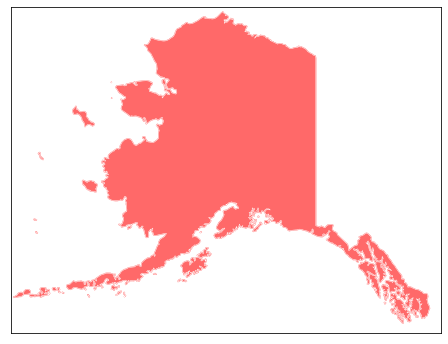

In [6]:
plt.figure(figsize=(12,6))
m2 = Basemap(llcrnrlon=-168,llcrnrlat=51,urcrnrlon=-120,urcrnrlat=71.1,
 projection='lcc',lat_1=52,lat_2=67,lon_0=-141)
m2.readshapefile('geodata/st99_d90','states',drawbounds=True,color='w')

for polygon,info in zip(m2.states,m2.states_info):
    state = info['NAME']
    if state in ('District of Columbia'): continue
    result = results2016[state]['Trump'] - results2016[state]['Clinton']
    colors = mycmap(.5 + result/100)
    xdata,ydata = zip(*polygon)
    plt.fill(xdata,ydata,color=colors,edgecolor='darkgrey')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


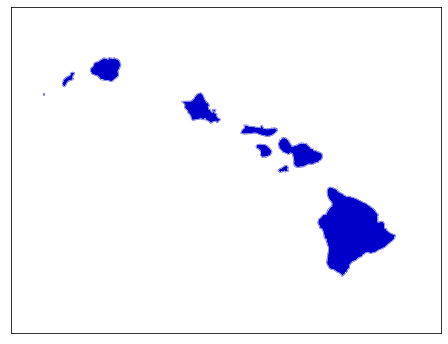

In [8]:
plt.figure(figsize=(12,6))
m = Basemap(llcrnrlon=-161,llcrnrlat=18,urcrnrlon=-154,urcrnrlat=23,
  projection='lcc',lat_1=19,lat_2=22,lon_0=-157)
m.readshapefile('geodata/st99_d90','states',drawbounds=True,color='w')

for polygon,info in zip(m.states,m.states_info):
    state = info['NAME']
    if state in ('District of Columbia'): continue
    result = results2016[state]['Trump'] - results2016[state]['Clinton']
    colors = mycmap(.5 + result/100)
    xdata,ydata = zip(*polygon)
    plt.fill(xdata,ydata,color=colors,edgecolor='darkgrey')

# About 
The objective of this visualization was to use the gradient of colors to identify the political position of voters in the 2016 presidential election and plot it onto a map (including Alaska and Hawaii). Although the votes in D.C. are counted as independent from Maryland, I thought that it was too small, geographically speaking, to incorporate into the map, or worry about coloring. 

As seen on the bar showing the gradient from dark blue to dark red, this represents the concentration of democratic votes and republican votes respectively.

# Simulation

In [3]:
print ('Total votes in NY in 2016:', results2016['New York']['vote_total']) #checking all votes in NY 
states =['Maine 1st District',
 'Maine 2nd District',
 'Nebraska 1st District',
 'Nebraska 2nd District',
 'Nebraska 3rd District'] #The votes from these districts are not used
tall_1 = 0
tall_2 = 0
hill_ev = 0
trump_ev = 0
for t in range(0,10000): 
    trump = [] 
    tall_trump = 0 
    hillary = []
    tall_hillary = 0
    for i in mean_std:
        if norm.rvs(mean_std[i][0],mean_std[i][1]) >= .5:
            if i not in states:
                if i == 'Nebraska - statewide':
                    i = 'Nebraska' #Nebraska-statewide = Nebraska
                if i == 'Maine - statewide':
                    i = 'Maine' #Maine-statewide = Maine
                trump.append(i)
        else:
            if i not in states:
                if i == 'Nebraska - statewide':
                    i = 'Nebraska'
                if i == 'Maine - statewide':
                    i = 'Maine'
                hillary.append(i)
    for state in results2016:
        if state in trump:
            tall_trump += results2016[state]['electoral_votes']
        if state in hillary:
            tall_hillary += results2016[state]['electoral_votes']
    hill_ev += tall_hillary
    trump_ev += tall_trump
    if tall_hillary > tall_trump: 
        tall_1 += 1
    else: 
        tall_2 += 1

Total votes in NY in 2016: 7721453


In [4]:
hillary_percent = (tall_1)/10000
trump_percent = (tall_2)/10000
print('Hillary Average Amount of Electoral Votes per 10000 Simulations:',hill_ev/10000) #avg EV 
print('Trump Average Amount of Electoral Votes per 10000 Simulations:', trump_ev/10000) #avg EV
print('Hillary Percent Chance of Winning:', hillary_percent,'%')
print('Trump Percent Chance of Winning:', trump_percent,'%')

Hillary Average Amount of Electoral Votes per 10000 Simulations: 301.462
Trump Average Amount of Electoral Votes per 10000 Simulations: 236.538
Hillary Percent Chance of Winning: 0.8791 %
Trump Percent Chance of Winning: 0.1209 %


# About
The objective was to draw from the specified 51 distributions (corresponding to the fifty states plus D.C), and based on the draw for the state, less than .5 ('Clinton') or greater than .5 ('Trump'), assign the electoral votes to the winning candidate. I tallied them up for all states and the candidate with 270 or more was declared the winner for that set of trials.

This was repeated 10000 times, and the percentage of those 10000 simulations won by each of the candidates determined the overall chances of winning. 

In [5]:
states =['Maine 1st District',
 'Maine 2nd District',
 'Nebraska 1st District',
 'Nebraska 2nd District',
 'Nebraska 3rd District'] 
tall_1 = 0
tall_2 = 0
hill_ev = 0
trump_ev = 0
for t in range(0,10000): 
    trump = [] 
    tall_trump = 0 
    hillary = []
    tall_hillary = 0
    bias = norm.rvs(0,.016) #bias added
    for i in mean_std:
        if norm.rvs(mean_std[i][0],mean_std[i][1]) + bias >= .5:
            if i not in states:
                if i == 'Nebraska - statewide':
                    i = 'Nebraska'
                if i == 'Maine - statewide':
                    i = 'Maine'
                trump.append(i)
        else:
            if i not in states:
                if i == 'Nebraska - statewide':
                    i = 'Nebraska'
                if i == 'Maine - statewide':
                    i = 'Maine'
                hillary.append(i)
    for state in results2016:
        if state in trump:
            tall_trump += results2016[state]['electoral_votes']
        if state in hillary:
            tall_hillary += results2016[state]['electoral_votes']
    hill_ev += tall_hillary
    trump_ev += tall_trump
    if tall_hillary > tall_trump: 
        tall_1 += 1
    else: 
        tall_2 += 1

In [6]:
hillary_percent = (tall_1)/10000
trump_percent = (tall_2)/10000
print('Hillary Average Amount of Electoral Votes per 10000 Simulations:',hill_ev/10000)  
print('Trump Average Amount of Electoral Votes per 10000 Simulations:', trump_ev/10000) 
print('Hillary Percent Chance of Winning:', hillary_percent,'%')
print('Trump Percent Chance of Winning:', trump_percent,'%')

Hillary Average Amount of Electoral Votes per 10000 Simulations: 300.5959
Trump Average Amount of Electoral Votes per 10000 Simulations: 237.4041
Hillary Percent Chance of Winning: 0.7274 %
Trump Percent Chance of Winning: 0.2726 %


# About
The previous simulations considered all of the voting per states as independent but there is bound to be some polling error in the same (correlated) direction over multiple states (not random across states), that could have a significant effect on the outcome. So I added a random correlated bias norm.rvs(0,.016) to all of the states and see what effect it has on the overall winning percentages.

Everything else was kept the same (the method for tallying, etc.)

In [8]:
states =['Maine 1st District',
 'Maine 2nd District',
 'Nebraska 1st District',
 'Nebraska 2nd District',
 'Nebraska 3rd District']

total_vote = 0

for st in results2016:
    total_vote += results2016[st]['vote_total']

trump_marg = []
hillary_marg = []
for t in range(0,20000):
    hillary = []
    trump = []
    hill_mar = 0
    trump_mar = 0
    tall_trump = 0
    tall_hillary = 0
    bias = norm.rvs(0, .016)
    prob = norm.rvs(mean_std[i][0],mean_std[i][1]) + bias
    for i in mean_std:
        if prob >= .5:
            if i not in states:
                if i == 'Nebraska - statewide':
                    i = 'Nebraska'
                if i == 'Maine - statewide':
                    i = 'Maine'
                trump.append(i)
        else:
            if i not in states:
                if i == 'Nebraska - statewide':
                    i = 'Nebraska'
                if i == 'Maine - statewide':
                    i = 'Maine'
                hillary.append(i)

    for state in results2016:
        if state in trump:
            tall_trump += results2016[state]['electoral_votes']
        if state in hillary:
            tall_hillary += results2016[state]['electoral_votes']
        
    hill_mar += results2016[state]['vote_total'] * (1 - prob)
    trump_mar += results2016[state]['vote_total'] * prob
        
    hillary_margin = (100*(total_vote - (trump_mar * 2)))/total_vote
    
    if tall_trump > 270:
        trump_marg.append(hillary_margin)
    else:
        hillary_marg.append(hillary_margin)

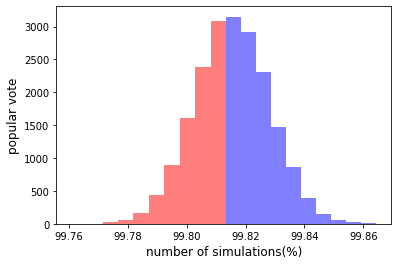

In [9]:
plt.hist(trump_marg, color = 'r', alpha=0.5)
plt.hist(hillary_marg, color = 'b', alpha=0.5)
plt.ylabel('popular vote', fontsize=12)
plt.xlabel('number of simulations(%)', fontsize=12);

# About
Using the random correlated bias norm.rvs(0,.016) from the simulation above, the visualization above is aimed to represent the likelihood of the outcomes and number of popular votes of each candidate according to 20,000 simulations.